![data-x](https://raw.githubusercontent.com/afo/data-x-plaksha/master/imgsource/dx_logo.png)


# Data-X: Introduction to TensorFlow 2.0, Tensorboard, and some Applications for Deep Learning

**Authors:** Alexander Fred-Ojala, Rajarathnam Balakrishnan

**Sources:** Francois Chollet, Sebastian Raschka, Aurélien Géron, etc.

**Copright:** Feel free to do whatever you want with this code.

___

## TensorFlow:
TensorFlow is one of the popular and adopted free and open-source deep learning library. It was first developed and maintained by Google. It can be used for both research and production.

## **TensorFlow benefits:**
- Highly efficient
- Cross-platform (works on IOS, Android, Unix, Windows, in the cloud, in the browser etc etc)
- Calculates gradients automatically (this is truly useful for Neural Networks, where the analytical solution of gradients would be VERY tedious to derive).
* Deep integration with the Keras library (Functional approach, as well as high-level wrapper)

# General notebook setup

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

# Hide warnings
import warnings
warnings.filterwarnings('ignore')

# Install TensorFlow 2.x

TensorFlow 2.x is a major change from TensorFlow 1.x (not backwards compatible, however you can use a tool to convert your TensorFlow 1.x code to 2.x).

The new version is designed to be more pythonic. It's  easier to debug models, extract values during training (because of the need of sessions and graphs in TensorFlow 1.x). 

TensorFlow 2.x supports eager execution by default, so you don't need a session and to evaluate operations / tensors in order to extract values.

In [ ]:
!pip install --pre tensorflow
# or for GPU version:
# !pip install -U --pre tensorflow-gpu

# Import TensorFlow

In [2]:
# Canonical way of importing TensorFlow
import tensorflow as tf

# If this doesn't work TensorFlow is not installed correctly

# Checking TensorFlow Version

In [3]:
# Check tf version, oftentimes tensorflow is not backwards compatible
tf.__version__

# should be tensorflow 2

'2.1.0-rc1'

# Intro to TensorFlow
### Core components:

#### 1. Tensor
A Tensor in TensorFlow is an N-dimensional array (just like Numpys array object). Tensors are multilinear maps from vector spaces to real numbers. Scalars, vectors and matrices are all tensors. The Tensor represents units of data in TensorFlow.

Numpy arrays or Pandas DataFrames sent to Tensorflow functions are automatically converted into TensorFlow tensors.

#### 2. Operations / Ops
TensorFlow operations or ops are units / edges / nodes of computation (e.g. matrix multiplication, addition, etc.)

#### 3. Computation Graph
The computational graph is is an optimized, compiled representation of the dataflow and the order of computations that are sent to an execution environment (for example during model training).

TensforFlow 2.x supports eager execution, but when we build a model and then train it TensorFlow we can compile the model and optimize the executions as a computational graph object. This is done by decorating a function with `@tf.function`.

This computational graph is then  sent to another instance / runtime environment (e.g. on a CPU or GPU) for execution. The results are sent back to us. This makes TensorFlow computations highly distributable and it also allows us to automatically evaluate all gradients in the computation nodes.

![](imgs/tf_graph.png)

TensorFlow 2.x supports eager execution by default.

In [4]:
tf.executing_eagerly()

True

# TensorBoard setup
Tip: Setup TensorBoard if you want to monitor and analyze computational graphs etc.

In [5]:
from datetime import datetime
import os
import pathlib

t = datetime.utcnow().strftime("%Y%m%d%H%M%S") 
log_dir = "tf_logs"
logd = "/tmp/{}/r{}/".format(log_dir, t)

# Make directory if it doesn't exist

from pathlib import Path
home = str(Path.home())

logdir = os.path.join(os.sep,home,logd)

if not os.path.exists(logdir):
    os.makedirs(logdir)

# 1. TensorFlow tensors

## 1.1 tf.constant

Constants are initialized directly and eager execution let's us see the values without creating a session and running the tensor.

In [6]:
a = tf.constant(2)
b = tf.constant(5)

In [7]:
a # note the numpy value

<tf.Tensor: shape=(), dtype=int32, numpy=2>

The .numpy() method will return the result as a numpy array.

In [8]:
# Eager evaluation of tensors
a.numpy()

2

### We can also perform operations on tensors

In [9]:
a*b

<tf.Tensor: shape=(), dtype=int32, numpy=10>

#### or the same with universal functions

In [10]:
tf.multiply(a,b).numpy()

10

In [11]:
a_matrix = tf.constant([[1,2], [3,4]])
b_matrix = tf.constant([[5,6], [7,8]])
b_matrix

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[5, 6],
       [7, 8]], dtype=int32)>

In [12]:
tf.matmul(a_matrix, b_matrix)

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[19, 22],
       [43, 50]], dtype=int32)>

## Note, we cannot reassign values of constants (like is the case with Variables).

In [13]:
try:
    a.assign(8)
except:
    print('Cannot assign contstants')

Cannot assign contstants


## 1.2 tf.Variable

Variables are mutable and can be updated and reassigned new values. Variables are usually weights and biases of a model that are optimized during training, they also indicate the degrees of freedom of the model (what model parameters that can change, thus making the model flexible).

In [14]:
var = tf.Variable(3.)
var

<tf.Variable 'Variable:0' shape=() dtype=float32, numpy=3.0>

In [15]:
# Reassign the value of a Variable
var.assign(4)
var

<tf.Variable 'Variable:0' shape=() dtype=float32, numpy=4.0>

In [16]:
var.numpy()

4.0

In [17]:
# we can also create multi dim Variables.
d = tf.Variable(np.random.randn(3).reshape(3,1)) #reshape
# automatically assings data type
d #

<tf.Variable 'Variable:0' shape=(3, 1) dtype=float64, numpy=
array([[-0.18082829],
       [ 0.12091778],
       [-0.38700844]])>

In [18]:
# inplace increase / decrease Variable values

var.assign(10)
print('original value:', var.numpy())
print('add 1:', var.assign_add(1.).numpy())
print('subtract 5:', var.assign_sub(5.).numpy())

original value: 10.0
add 1: 11.0
subtract 5: 6.0


### Variables also have a lot of attributes associated with them:

In [19]:
v = tf.Variable([[3.,3.2], [1.2,2.2]], dtype=tf.float32, name='my_variable')

print('name  : ', v.name)
print('type  : ', v.dtype)
print('shape : ', v.shape)
print('device: ', v.device)

name  :  my_variable:0
type  :  <dtype: 'float32'>
shape :  (2, 2)
device:  /job:localhost/replica:0/task:0/device:CPU:0


<div class='alert alert-info'><b>Note</b>: Tensorflow is really similar to NumPy, and you can think of the tensors as an ndimensional array.</div>


![tf_to_np](imgs/tf_to_np.png)
Source: CS227d, NLP, Stanford

# 2. Operations / Ops
Operations can be carried out directly or assigned to variables.

In [20]:
op1 = tf.add(a,b) # nothing happens
op1

<tf.Tensor: shape=(), dtype=int32, numpy=7>

In [21]:
a+b # same as tf.add, here the operation is not saved in the computation graph

<tf.Tensor: shape=(), dtype=int32, numpy=7>

In [22]:
v = a+b
u = v+2
w = v*u
z = w*3
z

<tf.Tensor: shape=(), dtype=int32, numpy=189>

## Look at the computational graph with @tf.function

`@tf.function` is a very useful module that can be used to convert simple python functions into a highly optimized computational graph that can be run on any runtime environment. When we build a model and then train it TensorFlow we can compile the model and optimize the executions.

In [23]:
@tf.function
def func(a,b):
    with tf.name_scope('first'):
        z = tf.multiply(a,b, name='z')
    with tf.name_scope('second'):
        y1 = tf.constant(3, name='3')
        y2 = tf.constant(4)
        w1 = tf.add(z, y1, name='w1')
        w2 = tf.add(z, y2, name='w2')
        
    return(w1+w2)

In [24]:
# Setup a writer to save graph information and TensorFlow logs
# To be displayed with Tensorboard

writer = tf.summary.create_file_writer(logdir) # create a writer
tf.summary.trace_on() # trace graph

In [25]:
a = tf.constant(3)
b = tf.constant(4)
func(a,b)
with writer.as_default():
    tf.summary.trace_export(
        name="func",
        step=0,
        profiler_outdir=logdir)

In [26]:
logdir

'/tmp/tf_logs/r20200619143941/'

In [27]:
# run tensorboard in the shell
%load_ext tensorboard
%tensorboard --logdir $logdir

### tf.function and Conditional statements
It is difficult to use conditions in graphs but we could implement that easily using `@tf.function` decorator 

In [28]:
@tf.function 
def g(x):
    y = tf.reduce_sum(x)
    if y > 0:
        return y
    return tf.abs(y)

In [29]:
print(tf.autograph.to_code(g.python_function))

def tf__g(x):
  do_return = False
  retval_ = ag__.UndefinedReturnValue()
  with ag__.FunctionScope('g', 'fscope', ag__.ConversionOptions(recursive=True, user_requested=True, optional_features=(), internal_convert_user_code=True)) as fscope:
    y = ag__.converted_call(tf.reduce_sum, (x,), None, fscope)

    def get_state():
      return ()

    def set_state(_):
      pass

    def if_true():
      do_return = True
      retval_ = fscope.mark_return_value(y)
      return do_return, retval_

    def if_false():
      do_return = True
      retval_ = fscope.mark_return_value(ag__.converted_call(tf.abs, (y,), None, fscope))
      return do_return, retval_
    cond = y > 0
    do_return, retval_ = ag__.if_stmt(cond, if_true, if_false, get_state, set_state, ('do_return', 'retval_'), ())
  do_return,
  return ag__.retval(retval_)



# Calculate gradients

Gradient evaluation is very importnat machine learning because it is based on function optimization. You can use `tf.GradientTape()` method to record the gradient of an arbitrary function

In [30]:
w = tf.Variable(3.0)

#watch the gradient of the loss operation
with tf.GradientTape() as tape:
    square_w = w * w

grad = tape.gradient(square_w, w)
print(f'The gradient of w^2 at {w.numpy()} is {grad.numpy()}')

The gradient of w^2 at 3.0 is 6.0


### Gradient of the Sigmoid function
In this example we evaluate the gradient of the sigmoid function 

$$\sigma(x) = \frac{1}{1+e^{-x}}$$

Note that 

$$\sigma'(x) = \frac{e^{-x}}{(1+e^{-x})^2} = \sigma(x)(1-\sigma(x)) $$

For instance 

$$\sigma'(0) = \sigma(0)(1-\sigma(0)) = \frac{1}{2}\left(1-\frac{1}{2} \right) = \frac{1}{4}$$

In [31]:
def sigmoid(x):
    return 1/(1 + tf.exp(-x))

In [32]:
#define a varaible
x = tf.Variable(0.)

#record the gradient
with tf.GradientTape() as tape:
    y = sigmoid(x)
    
res = tape.gradient(y, x).numpy()
print('The gradient of the sigmoid function at 0.0 is ', res)

The gradient of the sigmoid function at 0.0 is  0.25


# Linear Regression in TensorFlow

This example is refactored from https://www.tensorflow.org/guide/eager. We create a complete example of using linear regression to predict the parameters of the function 

$$y = f(x) + noise = 3 x + 2 + noise$$

Given a point $x$ we want to predict the value of $f(x)$. We train the model on 100 data pairs $(x,y)$. 

The model to learn is a linear model 

$$\hat{y} = W x + b$$

Note that, we use `tf.GradientTape` to record the gradient of the loss function with respect our model paramters.  

We use MSE to calcuate the loss 

$$MSE = \frac{1}{100} (y-\hat{y})^2$$

We use Gradient Descent to update the paramters 

$$W = W - \alpha  \frac{\partial MSE}{\partial W}$$

$$b = b - \alpha  \frac{\partial MSE}{\partial b}$$

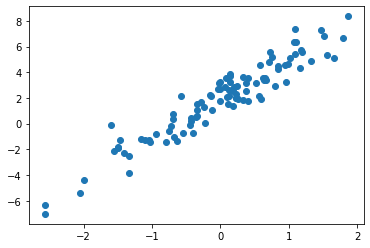

In [33]:
#100 data points 
NUM_EXAMPLES = 100

#define inputs and outputs with some noise 
X = tf.random.normal([NUM_EXAMPLES])  #inputs 
noise = tf.random.normal([NUM_EXAMPLES]) #noise 
y = X * 3 + 2 + noise  #true output

plt.scatter(X, y)

## Construction Phase

In [34]:
#create model paramters with initial values 
W = tf.Variable(0.)
b = tf.Variable(0.)

In [35]:
#training info
train_steps = 300
learning_rate = 0.01

In [36]:
tf.summary.trace_on() # trace graph

#watch the gradient flow
@tf.function  # Make it fast.
def train_on_batch(X, y):
    with tf.GradientTape() as tape:
        #forward pass 
        yhat = X * W + b

        #calcuate the loss (difference squared error)
        error = yhat - y
        loss = tf.reduce_mean(tf.square(error))

    #evalute the gradient with the respect to the parameters
    dW, db = tape.gradient(loss, [W, b])

    #update the parameters using Gradient Descent  
    W.assign_sub(dW * learning_rate)
    b.assign_sub(db* learning_rate)

    return(loss)

Loss at step 000: 12.539
Loss at step 020: 6.376
Loss at step 040: 3.468
Loss at step 060: 2.093
Loss at step 080: 1.442
Loss at step 100: 1.132
Loss at step 120: 0.985
Loss at step 140: 0.915
Loss at step 160: 0.882
Loss at step 180: 0.866
Loss at step 200: 0.858
Loss at step 220: 0.854
Loss at step 240: 0.853
Loss at step 260: 0.852
Loss at step 280: 0.851
W : 2.976006031036377 , b  = 1.9159764051437378 


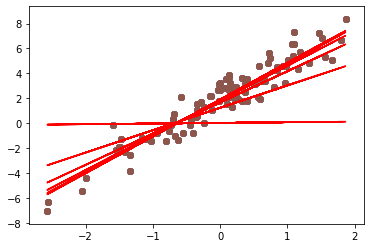

In [37]:
#print the loss every 20 iterations
for i in range(train_steps):
    loss = train_on_batch(X,y)

    
    # loss calculation after every 20 steps
    if i % 20 == 0:
        with writer.as_default():
            tf.summary.scalar('loss', loss, step=i)
        print("Loss at step {:03d}: {:.3f}".format(i, loss))
     
    # learning status through viz
    if i % 50 == 0: 
        plt.scatter(X, y)
        plt.plot(X, b+W*X, color='red')
        
        
print(f'W : {W.numpy()} , b  = {b.numpy()} ')

In [38]:
loss = train_on_batch(X,y)
with writer.as_default():
        tf.summary.trace_export(
        name="linreg",
        step=0,
        profiler_outdir=logdir)

In [39]:
%load_ext tensorboard
%tensorboard --logdir $logdir

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


Reusing TensorBoard on port 6008 (pid 2716), started 0:00:26 ago. (Use '!kill 2716' to kill it.)

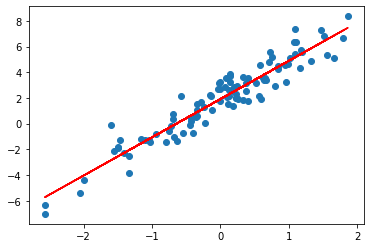

In [40]:
plt.scatter(X, y)
plt.plot(X, b+W*X, color='red')

# Google Colaboratory for Tensorflow

In order to utilize free GPU for running deep learning models using TensorFlow library, Google Colab is a great free online tool. It's a python development environment that is accessible through browser and provides Google cloud support like mounting Google Drive and Google Cloud Storage Buckets.

Check the following link to explore Google Colab.

https://colab.research.google.com/
![](imgs/colab.png)

# Image Classification using TensorFlow: A Deep Learning Application

## Objective:
The main focus of this segment of the notebook is to showcase what TensorFlow library is capable of, in terms of an example. The example is based on an exciting Deep Learning method for Image Classification using CNNs (Convolutional Neural Networks)

## Key takeaways:
1. Don't worry about the specifics of this example.
2. Here the goal for the learner is to get an overview of TensorFlow's role in a deep learning task.
3. Observe the various structured facilitation for key processes and steps involved in a deep learning task and how TensorFlow provides support.

## Process:
The specific focus here is to build and train a deep learning algorithm to classify images of flowers.
Any Machine Learning or Deep Learning tasks involve 3 main components:
1. Dataset
2. Model (Algorithm)
3. Learning

## 1. Dataset

Here we use the `tf_flowers` image dataset from a collection of datasets provided by TensorFlow. With the high-level API `keras`, we could download the dataset and associated images in separate directories as per their class names.

In [45]:
# importing required libs

import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import os
import glob
import shutil

### Download the dataset

In [46]:
# download the dataset

file = tf.keras.utils.get_file(origin = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz",
                              fname = "flower_photos.tgz",
                              extract = True,
                              cache_subdir = os.getcwd()+'/datasets/')

base_dir = os.path.join(os.path.dirname(file), "flower_photos")

### Explore the dataset

In [47]:
# the different classes of flowers present in the dataset

classe = os.listdir(base_dir)
classes = [item for item in classe if item != "LICENSE.txt"]
classes

['roses', 'sunflowers', 'daisy', 'dandelion', 'tulips']

In [48]:
# number of images in each category

for i in range(5):
    print(os.path.basename((glob.glob(base_dir+'/*')[i])),": ", len(os.listdir(glob.glob(base_dir+'/*')[i])))

roses :  641
sunflowers :  699
daisy :  633
dandelion :  898
tulips :  799


### Prepare Training and Validation Datasets

The dataset is loaded but for the purpose of training the model we need to prepare the **training** and **validation** set from the master dataset.

In [49]:
for cl in classes:
    img_path = os.path.join(base_dir, cl)
    images = glob.glob(img_path + '/*.jpg')
    print("{}: {} Images".format(cl, len(images)))
    num_train = int(round(len(images)*0.8))
    train, val = images[:num_train], images[num_train:]

    for t in train:
        if not os.path.exists(os.path.join(base_dir, 'train', cl)):
            os.makedirs(os.path.join(base_dir, 'train', cl))
        shutil.move(t, os.path.join(base_dir, 'train', cl))

    for v in val:
        if not os.path.exists(os.path.join(base_dir, 'val', cl)):
            os.makedirs(os.path.join(base_dir, 'val', cl))
        shutil.move(v, os.path.join(base_dir, 'val', cl))

roses: 641 Images
sunflowers: 699 Images
daisy: 633 Images
dandelion: 898 Images
tulips: 799 Images


In [50]:
# set up the path for train and val dataset

train_dir = os.path.join(base_dir, 'train')
val_dir = os.path.join(base_dir, 'val')

### Data Augmentation and Preprocessing

This step is crucial to improve the learning by artificially distorting original images to introduce different orientations, brightness etc. This enables the model to adapt to different qualities of image in order to generalize better. The images are clustered in to batches of equal number of images (mostly) and resized to same height and width in order to maintain uniform shape.

In [51]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

batch_size = 50
img_shape = 150

# Augmentation applied to train dataset only
train_gen = ImageDataGenerator(
                    rescale = 1./255,
                    rotation_range = 30,
                    width_shift_range = .15,
                    height_shift_range = .15,
                    horizontal_flip = True,
                    zoom_range = 0.30
                    )


train_data_gen = train_gen.flow_from_directory(
                                                batch_size = batch_size,
                                                directory = train_dir,
                                                shuffle = True,
                                                target_size = (img_shape, img_shape),
                                                class_mode = 'sparse'
                                                )

# Validation Dataset is rescaled and doesn't require augmentation

val_gen = ImageDataGenerator(rescale=1./255)

val_data_gen = val_gen.flow_from_directory(batch_size = batch_size,
                                                 directory = val_dir,
                                                 target_size = (img_shape, img_shape),
                                                 class_mode = 'sparse')

Found 2935 images belonging to 5 classes.
Found 735 images belonging to 5 classes.


In [52]:
def plotImgs(images_arr):
    fig, axes = plt.subplots(1, 5, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip(images_arr, axes):
        ax.imshow(img)
    plt.tight_layout()
    plt.show()

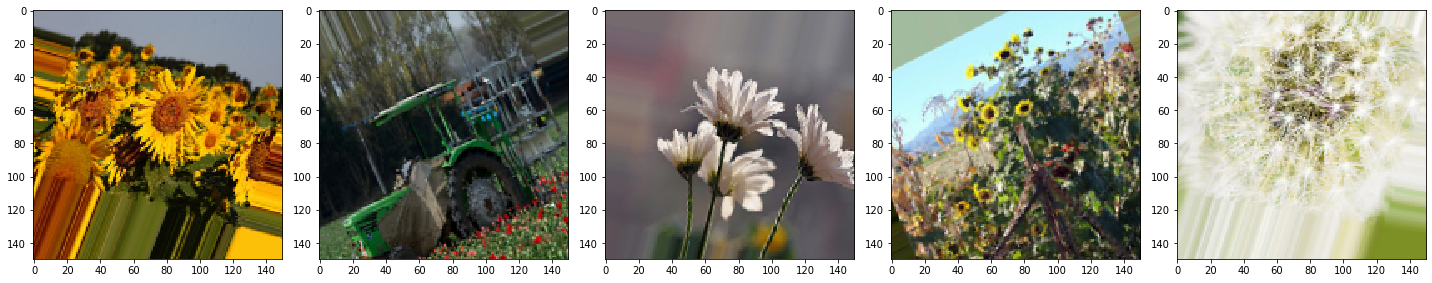

In [58]:
augmented_images = [train_data_gen[0][0][i] for i in range(5)]
plotImgs(augmented_images)

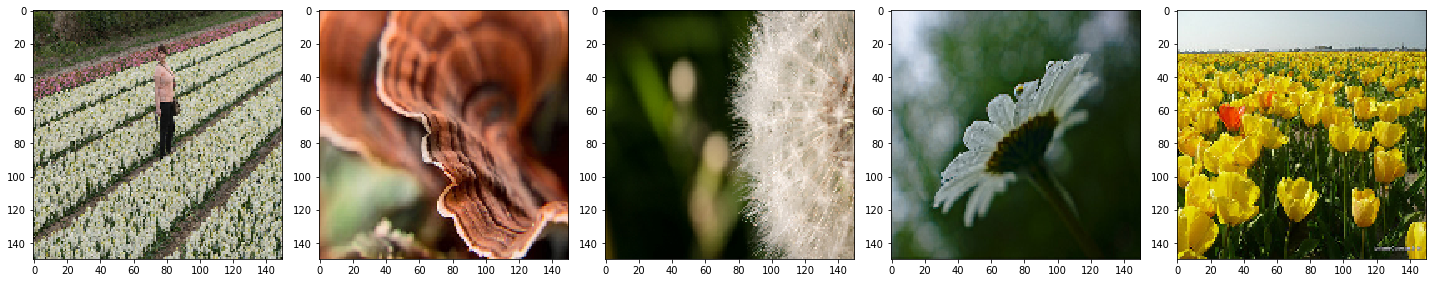

In [57]:
augmented_images = [val_data_gen[0][0][i] for i in range(5)]
plotImgs(augmented_images)

## 2. Model (Algorithm)

In this part we are going to build a CNN based model with multiple layers. The Neural Network to be built is a basic structure with convolution layers, flatten and dense layers. There are other alternatives to this step where we could use tensorflow's pre-trained networks with weights to train for a new dataset using transfer learning method. 

Do not worry if you could not grasp this part. In the next few modules these would be crystal clear. Remember this is just an overveiw.

In [59]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D

### Build the Convolutional Neural Network model

In [60]:
model = Sequential(name='simple_cnn_model')

model.add(Conv2D(16, 3, padding='same', activation='relu', input_shape=(img_shape, img_shape, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, 3, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, 3, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dropout(0.3))
model.add(Dense(512, activation='relu'))

model.add(Dropout(0.3))
model.add(Dense(5)) # represents probability scores for 5 classes of flowers

In [61]:
# let's check the model's summary i.e. architecture
model.summary()

Model: "simple_cnn_model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 150, 150, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 75, 75, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 75, 75, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 37, 37, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 37, 37, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 18, 18, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 20736)        

### Compile the model

In a simple way, compile allows us to set the optimizer, loss function, metrics and othe callbacks.

In [62]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

## 3. Training

Once the datasets are prepared, preprocessed and the custom deep learning model is built and compiled the next step is to train the compiled deep learning model on the datasets.

In [63]:
#import datetime, os

#log_dir = 'logs/fit/'+datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
#os.makedirs(log_dir)

In [64]:
from tensorflow.keras.callbacks import TensorBoard

epochs = 80
steps_per_epoch = train_data_gen.n//batch_size
validation_steps = val_data_gen.n//batch_size

tensorboard_callback = TensorBoard(log_dir = log_dir, histogram_freq = 1)

history = model.fit(
    train_data_gen,
    steps_per_epoch = steps_per_epoch,
    epochs = epochs,
    validation_data = val_data_gen,
    validation_steps = validation_steps,
    callbacks = [tensorboard_callback]
)

  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 58 steps, validate for 14 steps
Epoch 1/80
58/58 [==============================] - 28s 478ms/step - loss: 1.4631 - accuracy: 0.3858 - val_loss: 1.3194 - val_accuracy: 0.4543
Epoch 2/80
58/58 [==============================] - 26s 453ms/step - loss: 1.1407 - accuracy: 0.5369 - val_loss: 1.0775 - val_accuracy: 0.5800
Epoch 3/80
58/58 [==============================] - 26s 452ms/step - loss: 1.0493 - accuracy: 0.5702 - val_loss: 1.0295 - val_accuracy: 0.6171
Epoch 4/80
58/58 [==============================] - 26s 444ms/step - loss: 0.9933 - accuracy: 0.6062 - val_loss: 0.9183 - val_accuracy: 0.6629
Epoch 5/80
58/58 [==============================] - 26s 444ms/step - loss: 0.9438 - accuracy: 0.6340 - val_loss: 0.9243 - val_accuracy: 0.6257
Epoch 6/80
58/58 [==============================] - 25s 433ms/step - loss: 0.9076 - accuracy: 0.6392 - val_loss: 0.9742 - val_accuracy: 0.6343
Epoch 7/80
58/58 [==============================] 

58/58 [==============================] - 29s 506ms/step - loss: 0.4330 - accuracy: 0.8409 - val_loss: 0.7100 - val_accuracy: 0.7800
Epoch 57/80
58/58 [==============================] - 29s 505ms/step - loss: 0.4134 - accuracy: 0.8437 - val_loss: 0.6404 - val_accuracy: 0.7829
Epoch 58/80
58/58 [==============================] - 29s 508ms/step - loss: 0.3810 - accuracy: 0.8548 - val_loss: 0.6762 - val_accuracy: 0.7886
Epoch 59/80
58/58 [==============================] - 30s 509ms/step - loss: 0.4020 - accuracy: 0.8437 - val_loss: 0.7603 - val_accuracy: 0.7443
Epoch 60/80
58/58 [==============================] - 34s 582ms/step - loss: 0.3771 - accuracy: 0.8513 - val_loss: 0.7311 - val_accuracy: 0.7843
Epoch 61/80
58/58 [==============================] - 32s 549ms/step - loss: 0.3848 - accuracy: 0.8516 - val_loss: 0.7117 - val_accuracy: 0.7800
Epoch 62/80
58/58 [==============================] - 31s 540ms/step - loss: 0.3848 - accuracy: 0.8575 - val_loss: 0.7724 - val_accuracy: 0.7729
Epoc

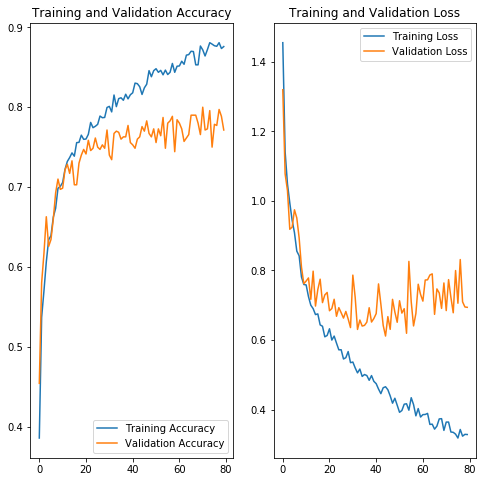

In [65]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [66]:
%load_ext tensorboard
%tensorboard --logdir logs

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


Reusing TensorBoard on port 6006 (pid 739), started 3:14:07 ago. (Use '!kill 739' to kill it.)